Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)

Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 1, 3, 13, 6, 10, 4, 11, 3, 7,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 103, 126, 145, 92, 122…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 30, 88, 82, 92, 78, 60, 76…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 41, 19, 0, 31, 33, 0, 25…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 235, 110, 0, 0, 192, 0, 7…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 43.3, 39.3, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 0.183, 0.7…
$ Age                      <dbl> 31, 21, 30, 29, 30, 33, 27, 57, 28, 45, 33, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:**

In a linear regression model, the outcome variable (dependent variable) must be a field of quantative values. Therefore, in this dataset it seems that majority could be suitable as the outcome variable as majority of the fields are classified as 'dbl' which means the values are floating point numbers.

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |Plasma glucose concentration at 2 hours in an oral glucose tolerance test|
| BMI         |Body mass index (weight in kg/(height in m)^2|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

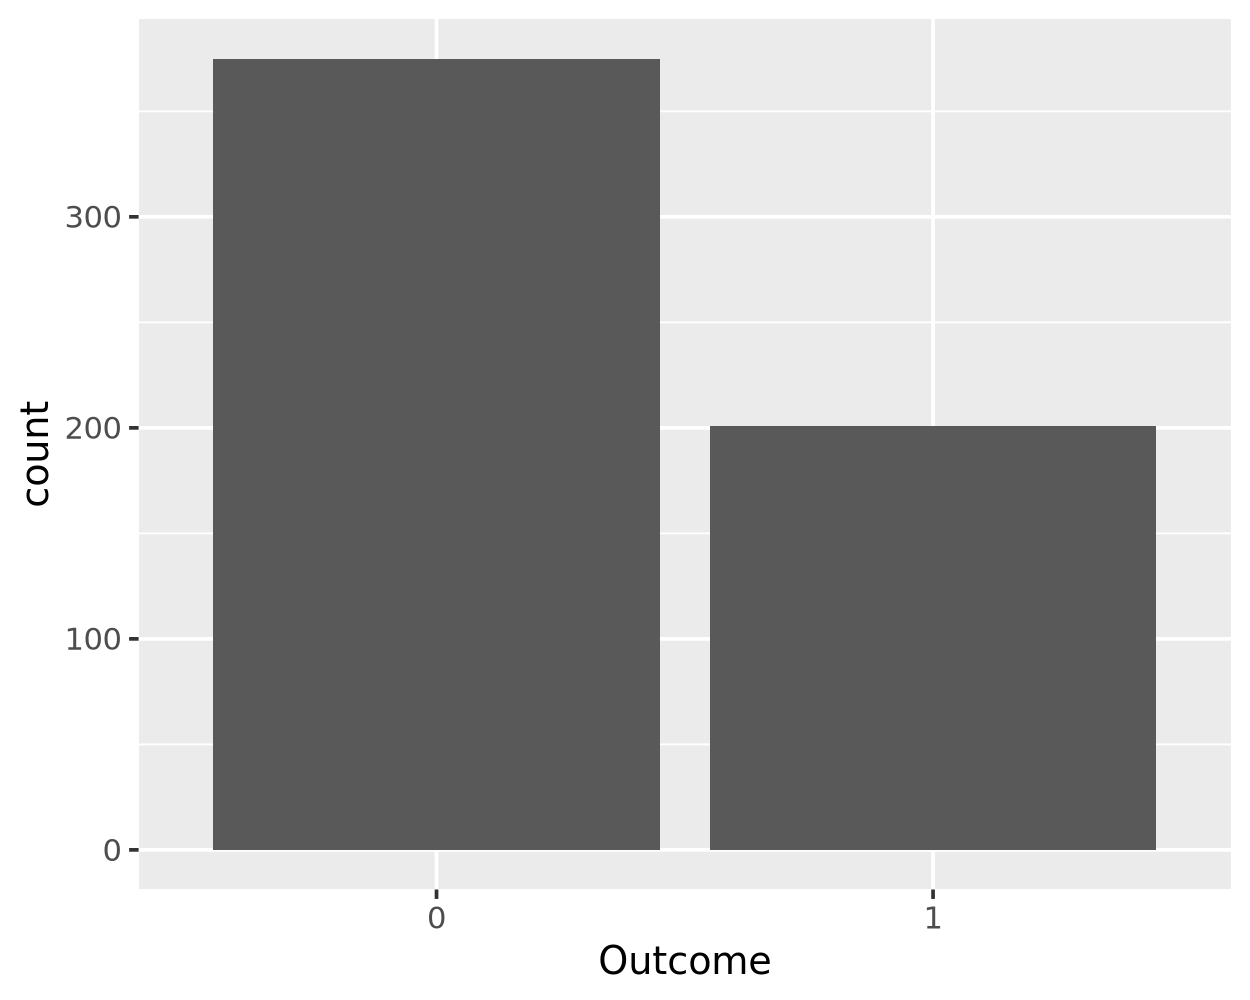

In [5]:
ggplot(diabetes_train, aes(x = Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

It seems that the data is NOT balanced. We see a higher count of no outcome (0) than an outcome (1). We see that there is almost double the count of zero outcome (~360) than an outcome (~200).

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

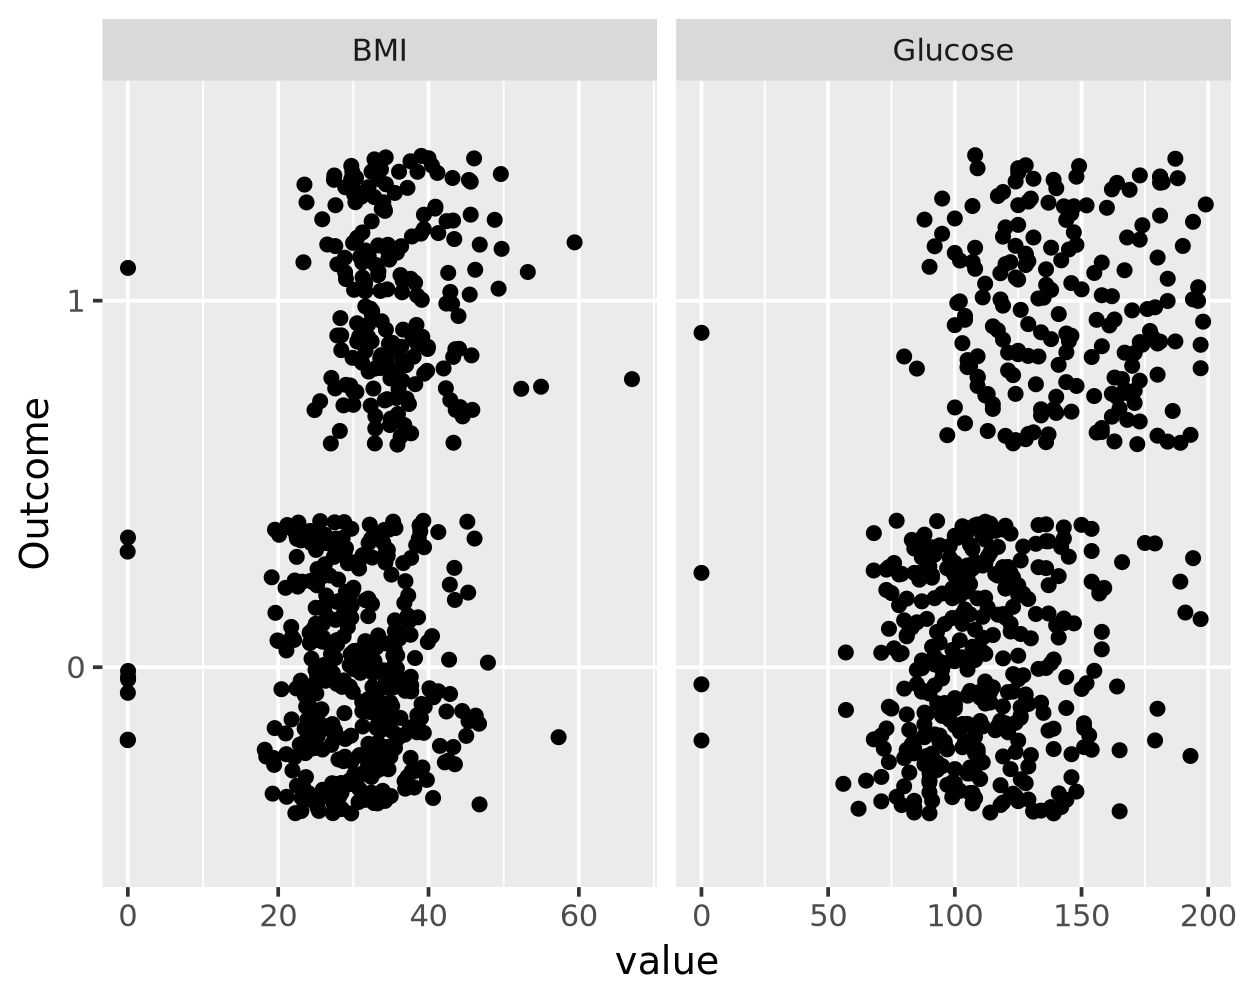

In [9]:
ggplot(plot_df, aes(x = value, y = Outcome)) + geom_jitter() +
facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

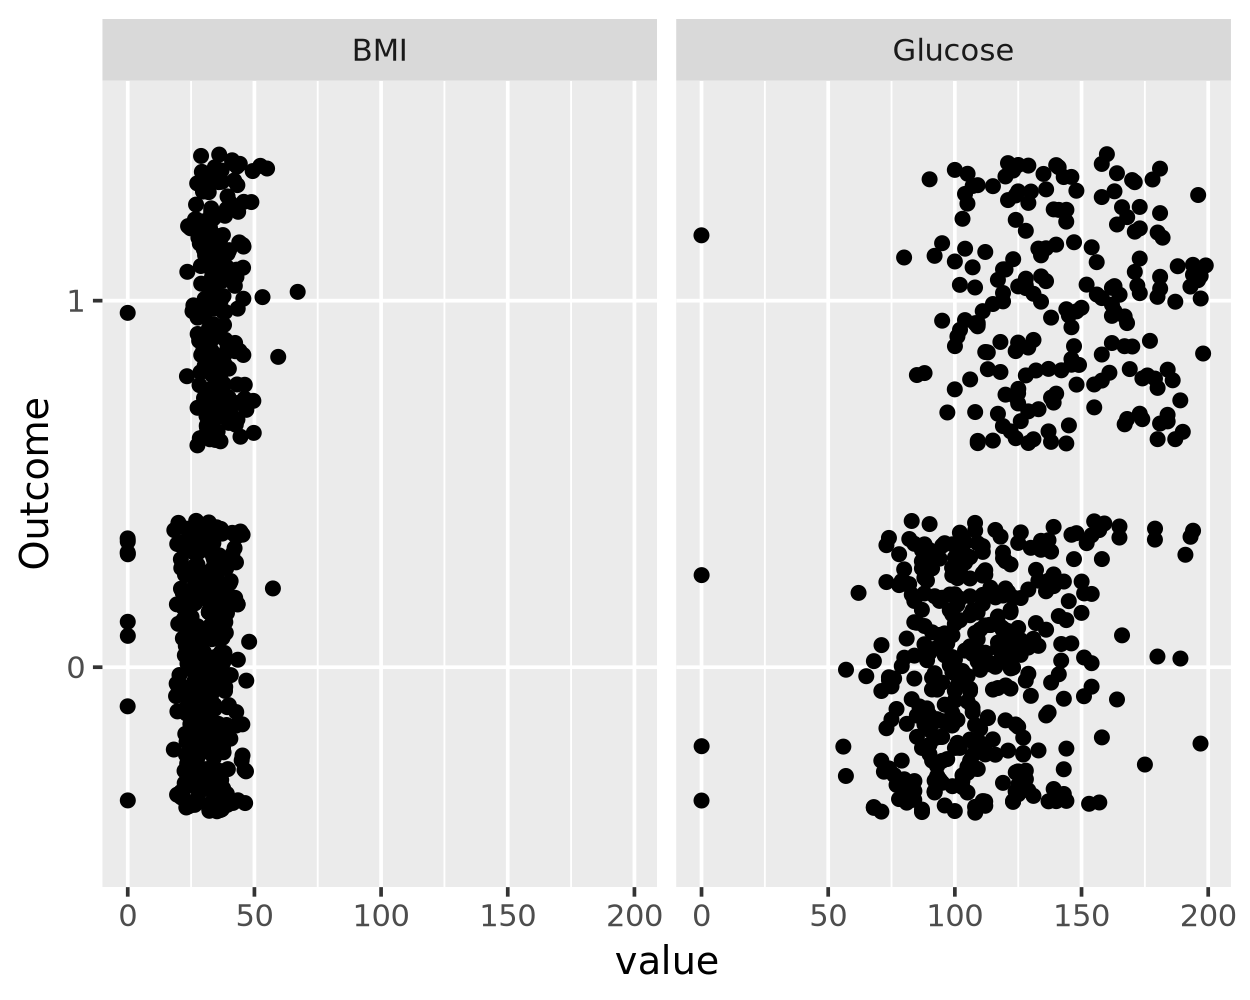

In [10]:
ggplot(plot_df, aes(x = value, y = Outcome)) + geom_jitter() +
facet_wrap(~name, ncol = 2)

After we remove the scales = 'free x' argument, we see the values for BMI in a more compressed trend as the x-axis increased in coordinate value. We also see that both BMI and Glucose have the same values for x-axis rather than different values when the scales function was applied.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [41]:

mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-8.01958333,0.724872986,-11.063432,1.887338e-28
BMI,0.08946541,0.016042307,5.576842,2.449241e-08
Glucose,0.03567769,0.003853706,9.258020,2.082585e-20


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [43]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)
glimpse(diabetes_test_wPred)

Rows: 192
Columns: 12
$ .pred_class              <fct> 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ .pred_0                  <dbl> 0.3557228, 0.9215283, 0.1496160, 0.6538198, 0…
$ .pred_1                  <dbl> 0.64427721, 0.07847166, 0.85038399, 0.3461802…
$ Pregnancies              <dbl> 8, 3, 2, 10, 5, 1, 8, 11, 1, 5, 5, 3, 4, 1, 1…
$ Glucose                  <dbl> 183, 78, 197, 139, 166, 115, 99, 143, 97, 117…
$ BloodPressure            <dbl> 64, 50, 70, 80, 72, 70, 84, 94, 66, 92, 75, 5…
$ SkinThickness            <dbl> 0, 32, 45, 0, 19, 30, 0, 33, 15, 0, 26, 11, 4…
$ Insulin                  <dbl> 0, 88, 543, 0, 175, 96, 0, 146, 140, 0, 0, 54…
$ BMI                      <dbl> 23.3, 31.0, 30.5, 27.1, 25.8, 34.6, 35.4, 36.…
$ DiabetesPedigreeFunction <dbl> 0.672, 0.248, 0.158, 1.441, 0.587, 0.529, 0.3…
$ Age                      <dbl> 32, 26, 53, 57, 51, 32, 50, 51, 22, 38, 60, 2…
$ Outcome                  <fct> 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [44]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 111  34
         1  14  33

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

 - We see that a total of 67 had diabetes in our test data
 - 33 of thoser that actually had diabetes were predicted to have diabetes by our model
 - 14 of those predicted to have diabetes did not have diabetes